# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import datetime as dt
# Import API key
api_key="67bbd44f9c04b46485066b28301bcff9"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

now = dt.datetime.today().strftime("%m/%d/%y")

## Generate Cities List

In [69]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identifying nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [70]:
# OpenWeatherMap API Key
api_key = "67bbd44f9c04b46485066b28301bcff9"

In [71]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


In [72]:
# Defining a list for city data
city_data = []


In [73]:
# Printting to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [74]:
# Creating counters
record_count = 1
set_count = 1

In [75]:
# Looping through the cities in the list
for i, city in enumerate(cities):

    # Grouping cities in sets of 50 
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        

    # Creating an endpoint URL 
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    
    
    # Logging the url, record, and setting  numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    
    # Adding  1 to the record count
    record_count = record_count + 1
    
    
 # Running an API request for each city
    try:
        # Parsing the JSON and retrieving data
        city_weather = requests.get(city_url).json()

        # Parseing out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Appending the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced...
    except:
        print("City not found. Skipping...")
        pass

# Indicating that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | san quintin
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | caravelas
Processing Record 12 of Set 1 | tawkar
City not found. Skipping...
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | roma
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | leningradskiy
Processing Record 21 of Set 1 | port-gentil
Processing Record 22 

Processing Record 33 of Set 4 | kedrovyy
Processing Record 34 of Set 4 | krasnorechenskiy
Processing Record 35 of Set 4 | kamenka
Processing Record 36 of Set 4 | morgantown
Processing Record 37 of Set 4 | vieste
Processing Record 38 of Set 4 | rincon
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | luganville
Processing Record 42 of Set 4 | avera
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | magadan
Processing Record 49 of Set 4 | prince rupert
Processing Record 0 of Set 5 | moshenskoye
Processing Record 1 of Set 5 | ust-kulom
Processing Record 2 of Set 5 | rundu
Processing Record 3 of Set 5 | duluth
Processing Record 4 of Set 5 | luderitz
Processing Record 

Processing Record 20 of Set 8 | bamako
Processing Record 21 of Set 8 | duzce
Processing Record 22 of Set 8 | vuktyl
Processing Record 23 of Set 8 | puerto madryn
Processing Record 24 of Set 8 | wewak
Processing Record 25 of Set 8 | belaya gora
Processing Record 26 of Set 8 | nogliki
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | batemans bay
Processing Record 29 of Set 8 | ypsonas
Processing Record 30 of Set 8 | torrevieja
Processing Record 31 of Set 8 | panzhihua
Processing Record 32 of Set 8 | lucapa
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | mana
Processing Record 35 of Set 8 | iwaki
Processing Record 36 of Set 8 | bambous virieux
Processing Record 37 of Set 8 | talawdi
City not found. Skipping...
Processing Record 38 of Set 8 | mpulungu
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | isabela
Processing Record 41 of Set 8 | thompson
Processing Record 42 of Set 8 | ust-kamchatsk
City not found. Skipping...
P

Processing Record 5 of Set 12 | karagay
Processing Record 6 of Set 12 | stokmarknes
Processing Record 7 of Set 12 | phan thiet
Processing Record 8 of Set 12 | narasapur
Processing Record 9 of Set 12 | sabha
Processing Record 10 of Set 12 | ewo
Processing Record 11 of Set 12 | sao gabriel da cachoeira
Processing Record 12 of Set 12 | axim
Processing Record 13 of Set 12 | weligama
Processing Record 14 of Set 12 | izoplit
Processing Record 15 of Set 12 | livramento
Processing Record 16 of Set 12 | placido de castro
Processing Record 17 of Set 12 | barawe
City not found. Skipping...
Processing Record 18 of Set 12 | sao jose da coroa grande
Processing Record 19 of Set 12 | suntar
Processing Record 20 of Set 12 | la asuncion
Processing Record 21 of Set 12 | fethiye
Processing Record 22 of Set 12 | warman
Processing Record 23 of Set 12 | naranjal
Processing Record 24 of Set 12 | urucui
Processing Record 25 of Set 12 | burica
City not found. Skipping...
Processing Record 26 of Set 12 | azar sh

In [76]:
# Converting a JSONs array into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

In [77]:

# Extracting relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [78]:
# Exporting City_Data DF into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

In [79]:
# Showing Record Count
city_data_pd.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [80]:
# Displaying City DF
city_data_pd.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carnarvon,0,ZA,1562717932,48,-30.97,22.13,49.91,6.31
1,busselton,74,AU,1562718170,60,-33.64,115.35,57.99,16.08
2,ushuaia,75,AR,1562718170,100,-54.81,-68.31,35.60,4.97
3,san quintin,76,PH,1562718003,76,17.54,120.52,79.61,2.77
4,victoria,90,BN,1562718170,88,5.28,115.24,77.00,2.24
5,saint george,20,GR,1562718170,69,39.45,22.34,82.99,2.55
6,georgetown,40,GY,1562717909,83,6.80,-58.16,82.40,6.93
7,hermanus,0,ZA,1562718171,95,-34.42,19.24,57.99,5.01
8,atuona,39,PF,1562717935,76,-9.80,-139.03,80.15,8.84
9,caravelas,17,BR,1562717939,64,-17.73,-39.27,70.43,11.27


### Plotting the Data


#### Latitude vs. Temperature Plot

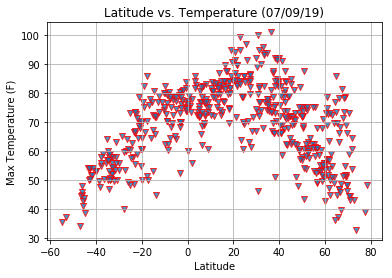

In [81]:
#Plot for Latitude vs Temperature
plt.scatter(lats, max_temps, edgecolor="red", linewidths=1, marker="v", alpha=0.8, label="Cities")


plt.title("Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Temperature.png")

# Showing the plot
plt.show()

#### Latitude vs. Humidity Plot

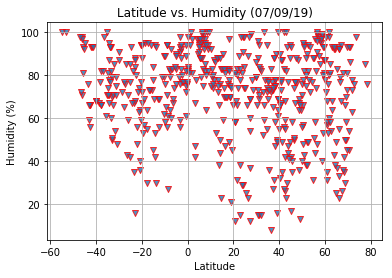

In [82]:
# Plot for latitude vs. humidity 
plt.scatter(lats,humidity, edgecolor="red", linewidths=1, marker="v", alpha=0.8, label="Cities")


plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Showing the plot
plt.show()

#### Latitude vs. Cloudiness Plot

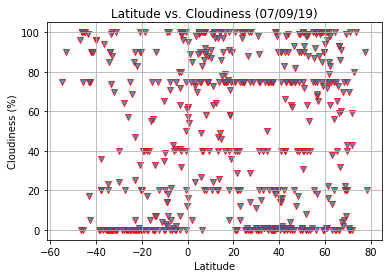

In [83]:
# Plots for latitude vs. cloudiness 
plt.scatter(lats, cloudiness, edgecolor="red", linewidths=1, marker="v", alpha=0.8, label="Cities")


plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Showing the plot
plt.show()


#### Latitude vs. Wind Speed Plot

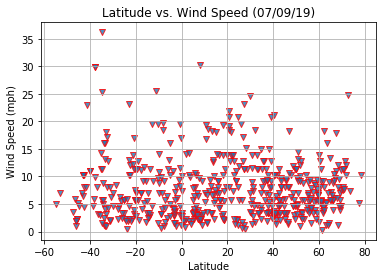

In [84]:
# Plots for latitude vs. wind speed plot
plt.scatter(lats,wind_speed, edgecolor="red", linewidths=1, marker="v",alpha=0.8, label="Cities")


plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Latitude_vs_Wind.png")

# Showing the plot
plt.show()